#### sklearn.linear_model.Ridge (다중공선성 제거되는 효과 얻고싶을 때)
- class sklearn.linear_model.Ridge(alpha=1.0(규제강도 조절,알파 0이면 릿지 사용하지 않음), *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)

In [1]:
import pandas as pd

house_df = pd.read_csv('C:\\Users\\SAMSUNG\\Documents\\vscode\\2024\\ML\\Datasets\\housing.csv',header=None,names =['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],sep="\s+")

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_2452\2696714004.py:3: SyntaxWarning: invalid escape sequence '\s'
  house_df = pd.read_csv('C:\\Users\\SAMSUNG\\Documents\\vscode\\2024\\ML\\Datasets\\housing.csv',header=None,names =['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],sep="\s+")
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_2452\2696714004.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# features와 label
features = house_df.drop('MEDV', axis=1)
label = house_df['MEDV']

In [4]:
# 릿지가 다중공선성을 약하게 만드는지 확인해보기위해 제거하지 않고 바로 train test셋으로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(features , label , test_size=0.2 , random_state=42)

In [5]:
# 데이터 스케일링
from sklearn.preprocessing import RobustScaler ,StandardScaler , MinMaxScaler
scaler = RobustScaler()
scaler.fit(X_train)
scaled_X_train  = scaler.transform(X_train)
scaled_X_test  = scaler.transform(X_test) 

In [8]:
# modeling
from sklearn.linear_model import Ridge, LinearRegression
rg_regressor = Ridge()
rg_regressor.fit(scaled_X_train, y_train)

Ridge()

In [7]:
rg_regressor.coef_

array([-0.3504594 ,  0.56218619,  0.39932427,  2.72043738, -2.97415656,
        3.34085697, -0.29900119, -4.66166703,  1.92758981, -3.63655469,
       -3.08831153,  0.25215394, -4.84702453])

In [9]:
lr =LinearRegression()
lr.fit(scaled_X_train, y_train)
lr.coef_

array([-0.35290689,  0.60220928,  0.52373794,  2.7844382 , -3.07927138,
        3.31248077, -0.30285502, -4.79666938,  2.09943788, -4.12030629,
       -3.11255122,  0.25051595, -4.88228567])

In [10]:
from sklearn.linear_model import Ridge, LinearRegression
rg_regressor = Ridge(alpha=10)
rg_regressor.fit(scaled_X_train, y_train)

Ridge(alpha=10)

In [11]:
rg_regressor.coef_

array([-0.33878289,  0.37722143, -0.06445195,  2.19209844, -2.24928226,
        3.5068176 , -0.27682434, -3.7509801 ,  1.19234956, -1.81139995,
       -2.88176052,  0.26282732, -4.57086384])

In [12]:
from sklearn.linear_model import Ridge, LinearRegression
rg_regressor = Ridge(alpha=100)
rg_regressor.fit(scaled_X_train, y_train)

Ridge(alpha=100)

In [13]:
rg_regressor.coef_

array([-0.35774988,  0.23091374, -0.38609138,  0.81896758, -0.69637301,
        3.51301318, -0.22316807, -1.35915668,  0.18179095, -0.45258887,
       -1.9138125 ,  0.29564069, -3.09653531])

In [17]:
from sklearn.model_selection import cross_val_score
import numpy as np
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas :
    ridge = Ridge(alpha= alpha)
    neg_mse_scores = cross_val_score(ridge, features, label, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha {alpha} 일 때, 5 fold의 평균 RMSE = {round(avg_rmse, 3)}')

alpha 0 일 때, 5 fold의 평균 RMSE = 5.829
alpha 0.1 일 때, 5 fold의 평균 RMSE = 5.788
alpha 1 일 때, 5 fold의 평균 RMSE = 5.653
alpha 10 일 때, 5 fold의 평균 RMSE = 5.518
alpha 100 일 때, 5 fold의 평균 RMSE = 5.33


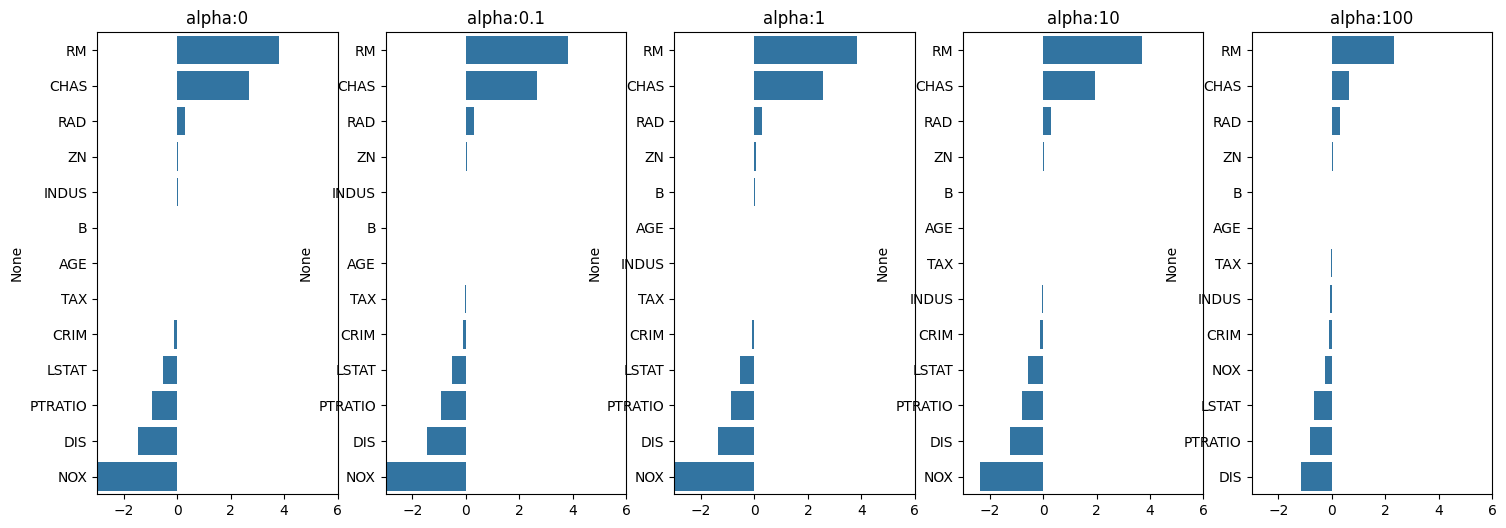

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(18,6),nrows=1,ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate (alphas) :
    ridge = Ridge(alpha= alpha)
    ridge.fit(features, label)
    
    coeff = pd.Series(data = ridge.coef_, index=features.columns)
    colname = 'alpha:' +str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y = coeff.index, ax = axs[pos])

plt.show()

#### sklearn.linear_model.Lasso (피쳐 셀렉션할 때 사용, 다중공선성 제거되는 효과도 있다)
- class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [21]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import Lasso
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas :
    ridge = Lasso(alpha= alpha)
    neg_mse_scores = cross_val_score(ridge, features, label, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha {alpha} 일 때, 5 fold의 평균 RMSE = {round(avg_rmse, 3)}')

alpha 0 일 때, 5 fold의 평균 RMSE = 5.829
alpha 0.1 일 때, 5 fold의 평균 RMSE = 5.615
alpha 1 일 때, 5 fold의 평균 RMSE = 5.776
alpha 10 일 때, 5 fold의 평균 RMSE = 6.586
alpha 100 일 때, 5 fold의 평균 RMSE = 8.393


#### sklearn.linear_model.ElasticNet
- class sklearn.linear_model.ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

- alpha : float, default=1.0
Constant that multiplies the penalty terms. Defaults to 1.0. See the notes for the exact mathematical meaning of this parameter. alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object. For numerical reasons, using alpha = 0 with the Lasso object is not advised. Given this, you should use the LinearRegression object.

- l1_ratio : float, default=0.5 (비율, 나머지도 0,5)
The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

In [23]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import ElasticNet
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas :
    elasticnet = ElasticNet(alpha= alpha , l1_ratio=0.6)
    neg_mse_scores = cross_val_score(elasticnet, features, label, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha {alpha} 일 때, 5 fold의 평균 RMSE = {round(avg_rmse, 3)}')

alpha 0 일 때, 5 fold의 평균 RMSE = 5.829
alpha 0.1 일 때, 5 fold의 평균 RMSE = 5.501
alpha 1 일 때, 5 fold의 평균 RMSE = 5.555
alpha 10 일 때, 5 fold의 평균 RMSE = 6.49
alpha 100 일 때, 5 fold의 평균 RMSE = 8.33


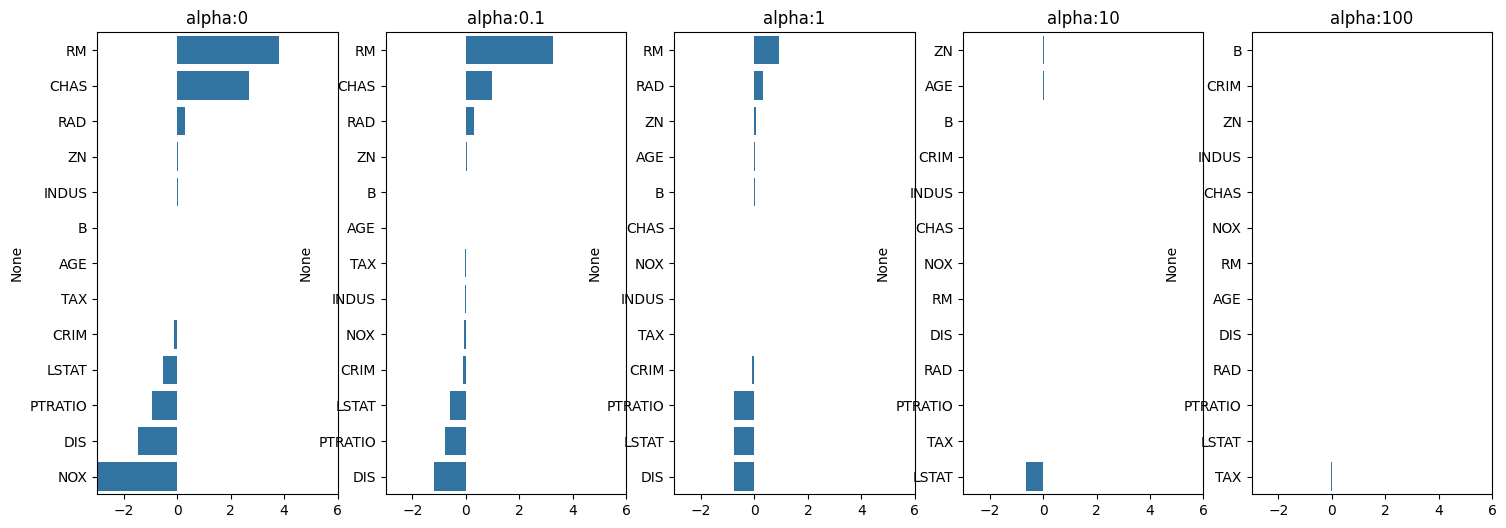

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig , axs = plt.subplots (figsize = (18, 6), nrows = 1, ncols = 5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate (alphas) :
    elasticnet = ElasticNet(alpha= alpha)
    elasticnet.fit(features, label)
    
    coeff = pd.Series(data = elasticnet.coef_, index=features.columns)
    colname = 'alpha:' +str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y = coeff.index, ax = axs[pos])

plt.show()